In [1]:
import pandas as pd

df_mat = pd.read_csv('student\student-mat.csv', sep=';')
df_por = pd.read_csv('student\student-por.csv', sep=';')
df_mat['SUBJECT'] = 'MAT'
df_por['SUBJECT'] = 'POR'
df = pd.concat([df_mat, df_por], ignore_index=True)
df.to_csv('student\student-merged.csv', sep=';', index=False, quoting=1)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,SUBJECT
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,MAT
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,MAT
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,MAT
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,MAT
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,MAT


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [3]:
print("Missing values: ", df.isna().sum().sum())

Missing values:  0


In [4]:
# One-hot encoding on categorical features
df = pd.get_dummies(df, drop_first=True)

df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,SUBJECT_POR
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,False
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,False
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,False
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,False


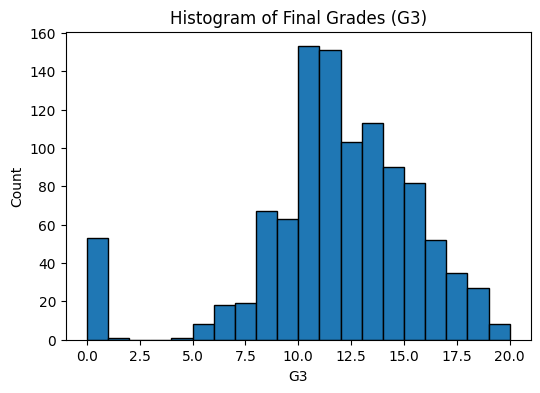

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(df['G3'], bins=20, edgecolor='black')
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

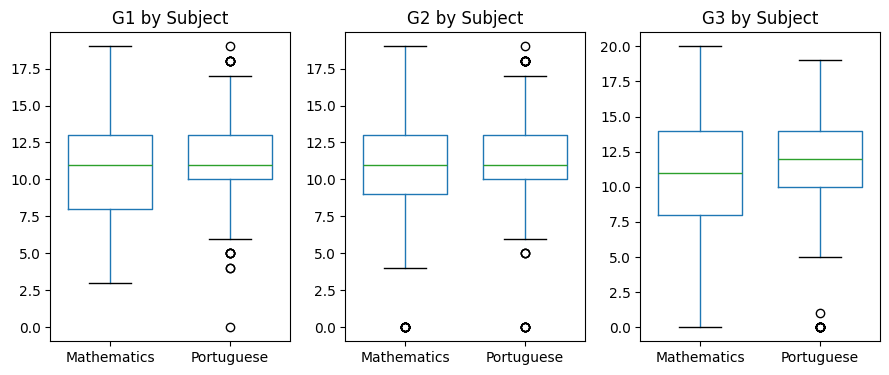

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(9, 4))

for i, grade in enumerate(['G1', 'G2', 'G3']):
    df.boxplot(column=grade, by='SUBJECT_POR', ax=axes[i], grid=False, widths=0.7)
    axes[i].set_title(f'{grade} by Subject')
    axes[i].set_xlabel(None)
    axes[i].set_xticklabels(['Mathematics', 'Portuguese'])

plt.suptitle('')
plt.tight_layout()
plt.show()

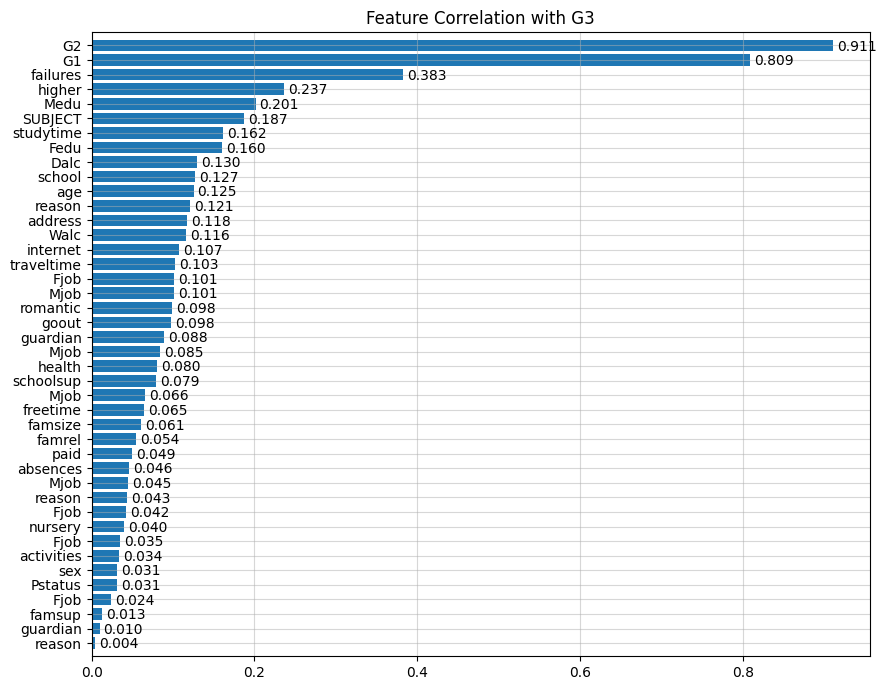

In [7]:
import numpy as np

correlations = df.corr()['G3'].abs().drop('G3').sort_values(ascending=True)

plt.figure(figsize=(9, 7))
bars = plt.barh(correlations.index, correlations.values)
plt.title('Feature Correlation with G3')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2.5,
             f'{width:.3f}', va='center', fontsize=10)

ax = plt.gca()
new_labels = [label.get_text().split('_', 1)[0] for label in ax.get_yticklabels()]
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(new_labels)
ax.grid(axis='both', alpha=0.5)

plt.ylim(bars[0].get_y() - 0.5, bars[-1].get_y() + bars[-1].get_height() + 0.5)
plt.tight_layout()
plt.show()


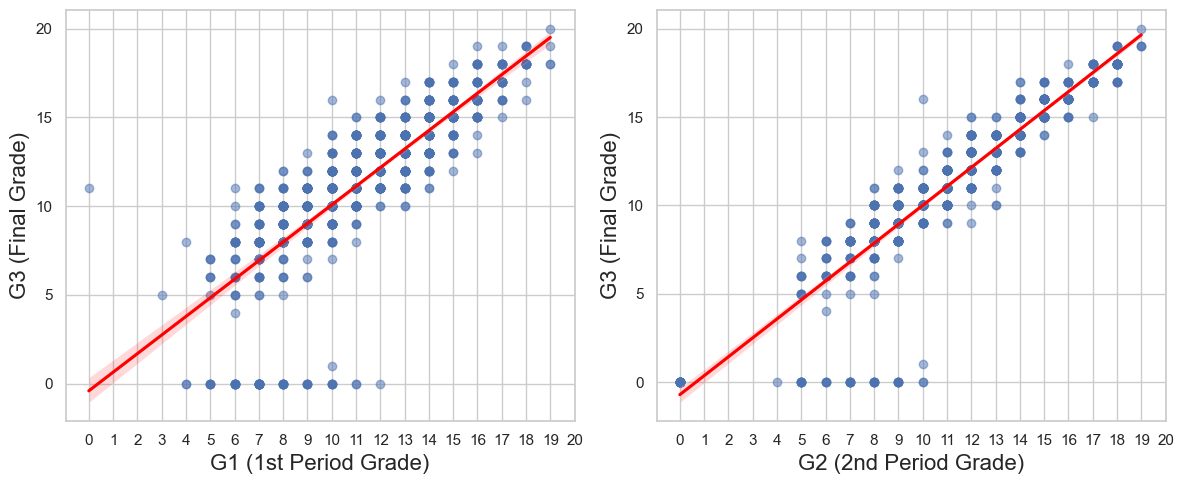

In [8]:
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(ax=axes[0], data=df, x='G1', y='G3', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_xlabel('G1 (1st Period Grade)', fontsize=16)
axes[0].set_ylabel('G3 (Final Grade)', fontsize=16)

sns.regplot(ax=axes[1], data=df, x='G2', y='G3', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_xlabel('G2 (2nd Period Grade)', fontsize=16)
axes[1].set_ylabel('G3 (Final Grade)', fontsize=16)

for i in axes:
    i.set_xticks(range(df['G3'].min(), df['G3'].max()+1))

plt.tight_layout()
plt.show()

In [9]:
X = df.drop(columns=['G3'])
y = df['G3']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,SUBJECT_POR
0,1.027889,1.242077,1.466302,0.652210,0.035606,-0.403106,0.068788,-0.195099,0.732511,-0.542374,...,False,True,False,False,False,True,True,False,False,False
1,0.221035,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,1.140653,-0.195099,-0.135527,-0.542374,...,False,False,True,False,False,False,True,True,False,False
2,-1.392674,-1.426089,-1.262431,-0.715074,0.035606,4.171268,0.068788,-0.195099,-1.003566,0.554987,...,False,True,False,True,False,True,True,True,False,False
3,-1.392674,1.242077,-0.352853,-0.715074,1.234713,-0.403106,-1.003076,-1.165019,-1.003566,-0.542374,...,False,False,True,True,True,True,True,True,True,False
4,-0.585820,0.352689,0.556724,-0.715074,0.035606,-0.403106,0.068788,-0.195099,-1.003566,-0.542374,...,False,False,True,True,False,True,True,False,False,False


Linear Regression
Training time: 0.0156s
Cross-validated RMSE: 1.5883472584649654
Cross-validated MAE: 0.9879172018092428
Cross-validated R-squared: 0.8295458219803532
Evaulation time: 0.7557s


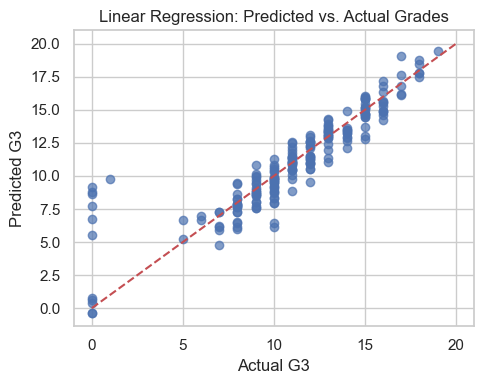

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import time

cv = KFold(n_splits=5, shuffle=True, random_state=420)

def train_eval_plot(model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training...", end='\r')
    training_start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_time = time.time() - training_start
    print("Training time:", f"{training_time:.4f}s")

    eval_start = time.time()
    print("Cross-validating RMSE...", end="\r")
    neg_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse)
    print("Cross-validated RMSE:", rmse_scores.mean())
    print("Cross-validating MAE...", end="\r")
    neg_mae = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mae_scores = -neg_mae
    print("Cross-validated MAE:", mae_scores.mean())
    print("Cross-validating R-squared...", end="\r")
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print("Cross-validated R-squared:", r2_scores.mean())
    evaulation_time = time.time() - eval_start
    print("Evaulation time:", f"{evaulation_time:.4f}s")

    plt.figure(figsize=(5, 4))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual G3')
    plt.ylabel('Predicted G3')
    plt.title(f'{model_name}: Predicted vs. Actual Grades')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

from sklearn.linear_model import LinearRegression
print("Linear Regression")
train_eval_plot(LinearRegression(), "Linear Regression")

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

max_depth_list = [5, 10, 20, None]
min_samples_split_list = [10, 30, 50, 70, 100]
total = len(max_depth_list) * len(min_samples_split_list)
best_rmse = float('inf')
best_params = dict()
params = list()
iteration = 0
total_start_time = time.time()

print("Decision Tree hyperparameter tuning...")
for min_samples_split in min_samples_split_list:
    for max_depth in max_depth_list:
        iteration += 1
        print(f"Iteration {iteration}/{total}:",
                f"min_samples_split={min_samples_split}",
                f"max_depth={max_depth}",
                sep=" ", end="    \r")
        model = DecisionTreeRegressor(
            min_samples_split=min_samples_split,
            max_depth=max_depth,
            random_state=42
        )
        rmses = []
        for train_idx, test_idx in cv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            rmses.append(rmse)
        avg_rmse = np.mean(rmses)
        if avg_rmse < best_rmse:
            best_rmse = avg_rmse
            best_params = {'min_samples_split': min_samples_split,
                            'max_depth': max_depth}
        params.append({'min_samples_split': min_samples_split,
                        'max_depth': max_depth,
                        'Actual depth': model.get_depth(),
                        'rmse': avg_rmse})

print("Best parameters:", best_params)
print(f"Best cross-validated RMSE: {best_rmse:.8f}")
total_time = time.time() - total_start_time
print("Total time:", f"{total_time:.4f}s")
print("Average time per iteration:", f"{(total_time/total):.4f}s")

params_df = pd.DataFrame(params)
params_df.head().fillna("Unlimited")

Decision Tree hyperparameter tuning...
Best parameters: {'min_samples_split': 30, 'max_depth': 5}
Best cross-validated RMSE: 1.48291082
Total time: 2.1732s
Average time per iteration: 0.1087s


,min_samples_split,max_depth,Actual depth,rmse
0,10,5.0,5,1.499252
1,10,10.0,10,1.784961
2,10,20.0,18,1.820102
3,10,Unlimited,18,1.820102
4,30,5.0,5,1.482911


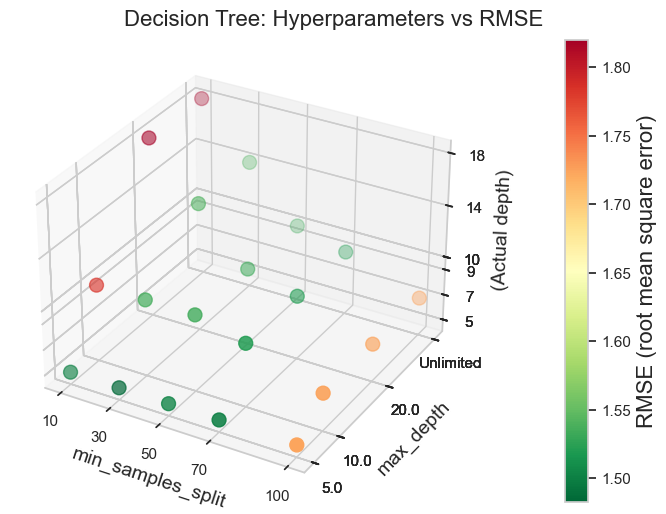

In [12]:
from matplotlib.colors import Normalize
from matplotlib import cm

rmse_values = params_df['rmse']
replacement = params_df['max_depth'].dropna().max() + 10
md_values = params_df['max_depth'].fillna(replacement).astype(float)
norm = Normalize(vmin=rmse_values.min(), vmax=rmse_values.max())
cmap = cm.RdYlGn_r # Reversed RdYlGn colormap (Red to Green)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
                params_df['min_samples_split'],
                md_values,
                params_df['Actual depth'],
                c=rmse_values, cmap=cmap, norm=norm, s=100)
ax.set_xlabel('min_samples_split', fontsize=14)
ax.set_ylabel('max_depth', fontsize=14)
ax.set_zlabel('(Actual depth)', fontsize=14)
ax.set_xticks(min_samples_split_list)
ax.set_yticks(md_values, ["Unlimited" if (str(i) == "nan") else i for i in params_df['max_depth']])
ax.set_zticks(params_df['Actual depth'])
ax.set_title("Decision Tree: Hyperparameters vs RMSE", pad=10, x=0.7, fontsize=16)

cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('RMSE (root mean square error)', fontsize=16)

plt.show()

Decision Tree parameters: {'min_samples_split': 30, 'max_depth': 5}
Training time: 0.0332s
Cross-validated RMSE: 1.4829108213802236
Cross-validated MAE: 0.9032246011193372
Cross-validated R-squared: 0.8481236380317728
Evaulation time: 0.6363s


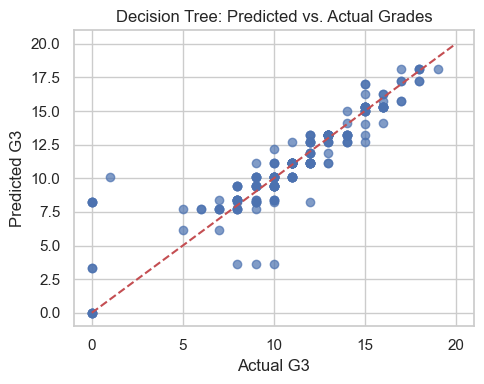

In [13]:
print("Decision Tree parameters:", best_params)
train_eval_plot(DecisionTreeRegressor(max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              random_state=42),
     "Decision Tree")

In [14]:
from sklearn.ensemble import RandomForestRegressor

n_estimators_list = [10, 30, 60, 100]
total = len(n_estimators_list) * len(max_depth_list) * len(min_samples_split_list)
best_rmse = float('inf')
best_params = dict()
params = list()
iteration = 0
total_start_time = time.time()

print("Random Forest hyperparameter tuning...")
for n_estimators in n_estimators_list:
    for min_samples_split in min_samples_split_list:
        for max_depth in max_depth_list:
            iteration += 1
            print(f"Iteration {iteration}/{total}:",
                    f"n_estimators={n_estimators}",
                    f"min_samples_split={min_samples_split}",
                    f"max_depth={max_depth}",
                    sep=" ", end="       \r")
            model = RandomForestRegressor(
                n_estimators=n_estimators,
                min_samples_split=min_samples_split,
                max_depth=max_depth,
                n_jobs=-1,
                random_state=42
            )
            iteration_start_time = time.time()
            rmses = []
            for train_idx, test_idx in cv.split(X):
                X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
                y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                rmse = np.sqrt(mean_squared_error(y_test, y_pred))
                rmses.append(rmse)
            avg_rmse = np.mean(rmses)
            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_params = {'n_estimators': n_estimators,
                                'min_samples_split': min_samples_split,
                                'max_depth': max_depth}
            iteration_time = time.time() - iteration_start_time
            params.append({'n_estimators': n_estimators,
                            'min_samples_split': min_samples_split,
                            'max_depth': max_depth,
                            'rmse': avg_rmse,
                            'time': iteration_time})

print("Best parameters:", best_params)
print(f"Best cross-validated RMSE: {best_rmse:.8f}")
total_time = time.time() - total_start_time
print("Total time:", f"{total_time:.4f}s")
print("Average time per iteration:",
      f"{(total_time/total):.4f}s;",
      "Mean:",
      f"{np.mean([i['time'] for i in params]):.4f}s")

params_df = pd.DataFrame(params)
params_df.head().fillna("Unlimited")

Random Forest hyperparameter tuning...
Best parameters: {'n_estimators': 100, 'min_samples_split': 30, 'max_depth': 10}
Best cross-validated RMSE: 1.44738179
Total time: 114.3031s
Average time per iteration: 1.4288s; Mean: 1.4285s


,n_estimators,min_samples_split,max_depth,rmse,time
0,10,10,5.0,1.476915,0.465093
1,10,10,10.0,1.521666,0.432026
2,10,10,20.0,1.525001,0.484950
3,10,10,Unlimited,1.525001,0.516321
4,10,30,5.0,1.456826,0.469993


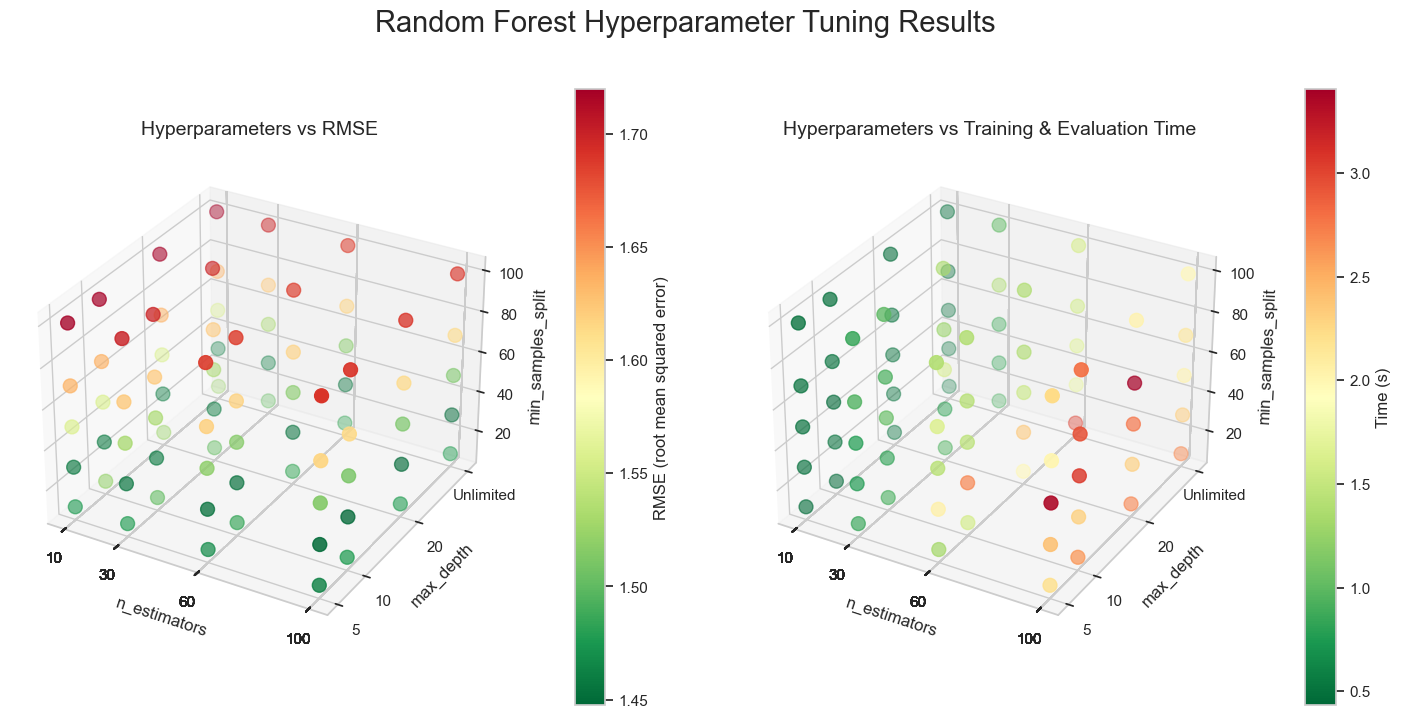

In [ ]:
valid_depths = params_df['max_depth'].dropna()
replacement = valid_depths.max() + 10
md_values = params_df['max_depth'].fillna(replacement)
depth_ticks = sorted(md_values.unique())
depth_labels = ["Unlimited" if pd.isna(orig) else str(int(orig))
                for orig in params_df['max_depth'].unique()]
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(18, 8))
norm_rmse = Normalize(vmin=params_df['rmse'].min(), vmax=params_df['rmse'].max())
norm_time = Normalize(vmin=params_df['time'].min(), vmax=params_df['time'].max())
cmap = cm.RdYlGn_r

# First plot: RMSE
sc1 = ax1.scatter(
    params_df['n_estimators'], md_values, params_df['min_samples_split'],
    c=params_df['rmse'], cmap=cmap, norm=norm_rmse, s=100
)
ax1.set_xlabel('n_estimators', fontsize=12)
ax1.set_ylabel('max_depth', fontsize=12)
ax1.set_zlabel('min_samples_split', fontsize=12)
ax1.set_xticks(params_df['n_estimators'])
ax1.set_yticks(depth_ticks)
ax1.set_yticklabels(depth_labels)
ax1.set_title("Hyperparameters vs RMSE", pad=10, x=0.5, fontsize=14)
cbar1 = fig.colorbar(sc1, ax=ax1, pad=0.1)
cbar1.set_label('RMSE (root mean squared error)', fontsize=12)

# Second plot: Time
sc2 = ax2.scatter(
    params_df['n_estimators'], md_values, params_df['min_samples_split'],
    c=params_df['time'], cmap=cmap, norm=norm_time, s=100
)
ax2.set_xlabel('n_estimators', fontsize=12)
ax2.set_ylabel('max_depth', fontsize=12)
ax2.set_zlabel('min_samples_split', fontsize=12)
ax2.set_xticks(params_df['n_estimators'])
ax2.set_yticks(depth_ticks)
ax2.set_yticklabels(depth_labels)
ax2.set_title("Hyperparameters vs Training & Evaluation Time", pad=10, x=0.5, fontsize=14)
cbar2 = fig.colorbar(sc2, ax=ax2, pad=0.1)
cbar2.set_label('Time (s)', fontsize=12)

fig.subplots_adjust(wspace=0.1)
fig.suptitle("Random Forest Hyperparameter Tuning Results", fontsize=21, y=0.98)
plt.show()

Random Forest parameters: {'n_estimators': 100, 'min_samples_split': 30, 'max_depth': 10}
Training time: 0.9372s
Cross-validated RMSE: 1.4473817903150725
Cross-validated MAE: 0.8965975186808688
Cross-validated R-squared: 0.8570922470217652
Evaulation time: 10.2582s


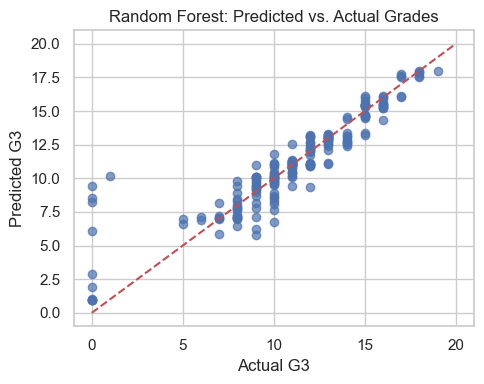

In [16]:
print("Random Forest parameters:", best_params)
train_eval_plot(RandomForestRegressor(max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              random_state=42),
     "Random Forest")